<a href="https://colab.research.google.com/github/IgorVaryvoda/Image-captioning/blob/main/VIT_tag_images_for_Sirv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
from google.colab import files
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install transformers timm fairscale --upgrade

In [7]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests
from google.colab import files
with open('/content/images.txt', 'w') as writefile:
    writefile.write("Delete this line and paste your image URLs here")
files.view('/content/images.txt')

<IPython.core.display.Javascript object>

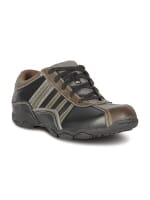

Predicted class: clog, geta, patten, sabot


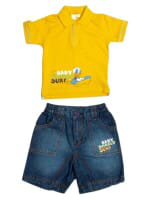

Predicted class: swimming trunks, bathing trunks


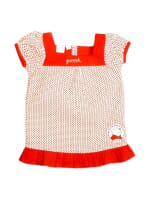

Predicted class: jersey, T-shirt, tee shirt


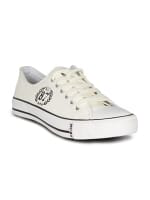

Predicted class: Loafer


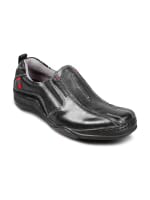

Predicted class: Loafer


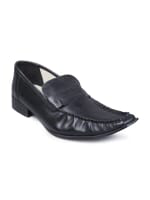

Predicted class: Loafer


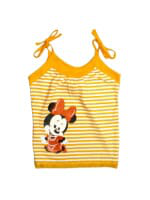

Predicted class: maillot, tank suit


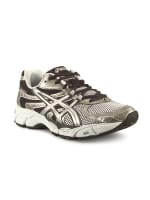

Predicted class: running shoe


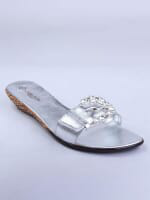

Predicted class: sandal


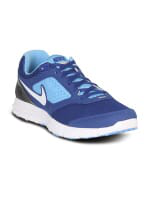

Predicted class: running shoe


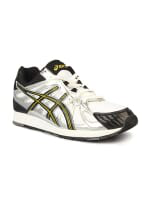

Predicted class: running shoe


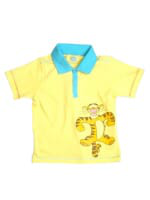

Predicted class: jersey, T-shirt, tee shirt


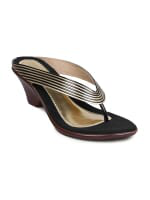

Predicted class: sandal


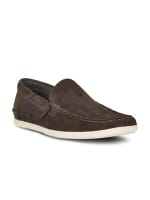

Predicted class: Loafer


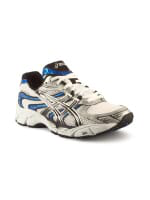

Predicted class: running shoe


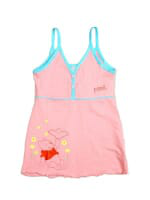

Predicted class: maillot, tank suit


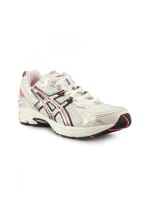

Predicted class: running shoe


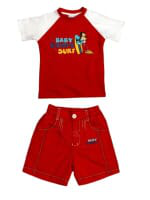

Predicted class: swimming trunks, bathing trunks


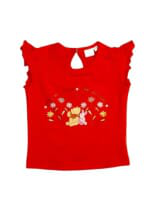

Predicted class: jersey, T-shirt, tee shirt


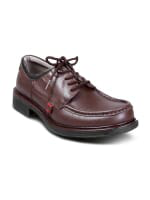

Predicted class: Loafer


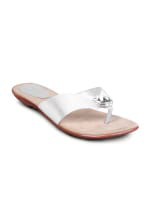

Predicted class: sandal


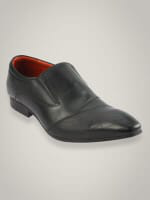

Predicted class: Loafer


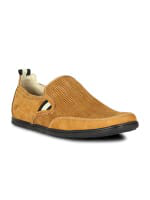

Predicted class: Loafer


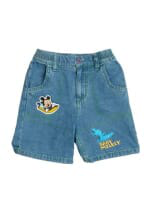

Predicted class: swimming trunks, bathing trunks


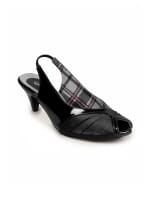

Predicted class: Loafer


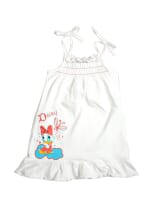

Predicted class: swimming trunks, bathing trunks


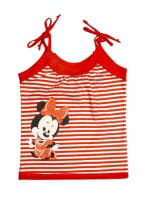

Predicted class: maillot, tank suit


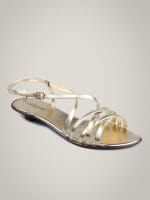

Predicted class: sandal


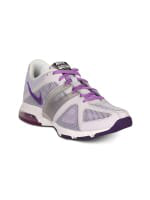

Predicted class: running shoe


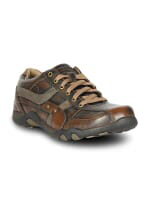

Predicted class: clog, geta, patten, sabot


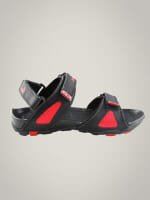

Predicted class: sandal


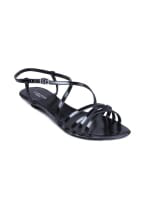

Predicted class: sandal


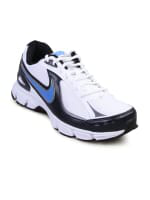

Predicted class: running shoe


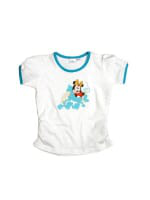

Predicted class: jersey, T-shirt, tee shirt


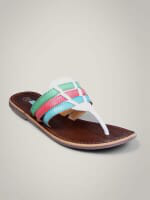

Predicted class: sandal


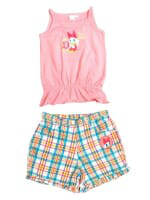

Predicted class: swimming trunks, bathing trunks


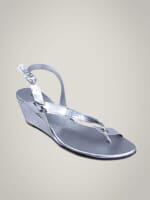

Predicted class: sandal


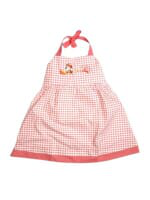

Predicted class: swimming trunks, bathing trunks


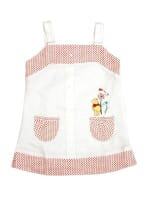

Predicted class: apron


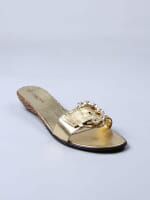

Predicted class: sandal


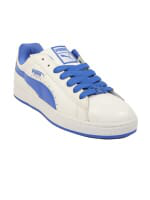

Predicted class: running shoe


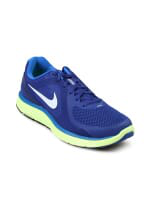

Predicted class: running shoe


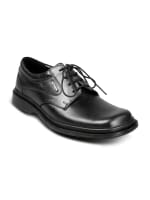

Predicted class: Loafer


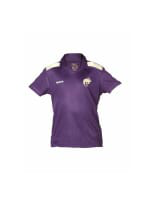

Predicted class: jersey, T-shirt, tee shirt


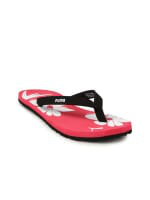

Predicted class: sandal


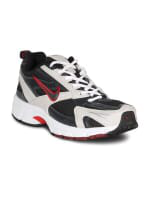

Predicted class: running shoe


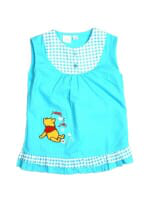

Predicted class: swimming trunks, bathing trunks


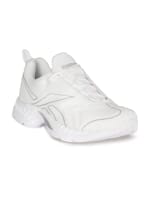

Predicted class: running shoe


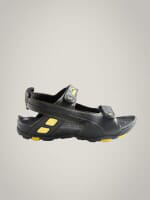

Predicted class: sandal


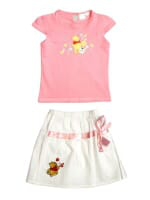

Predicted class: miniskirt, mini


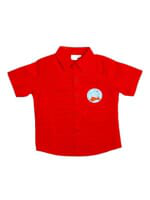

Predicted class: jersey, T-shirt, tee shirt


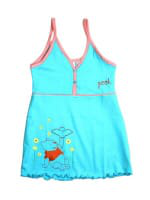

Predicted class: maillot, tank suit


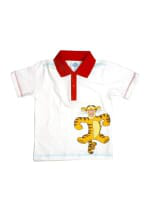

Predicted class: jersey, T-shirt, tee shirt


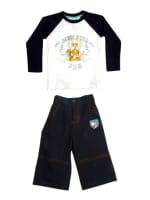

Predicted class: jersey, T-shirt, tee shirt


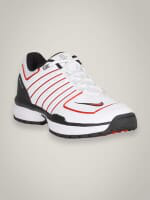

Predicted class: running shoe


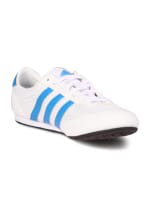

Predicted class: running shoe


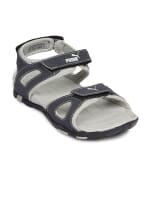

Predicted class: sandal


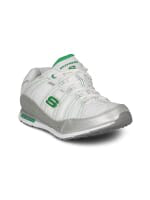

Predicted class: running shoe


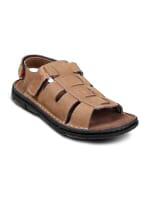

Predicted class: sandal


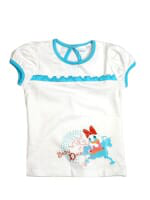

Predicted class: jersey, T-shirt, tee shirt


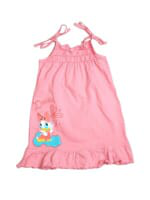

Predicted class: maillot, tank suit


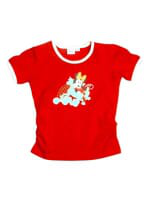

Predicted class: jersey, T-shirt, tee shirt


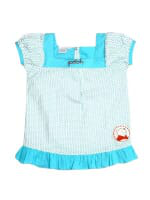

Predicted class: miniskirt, mini


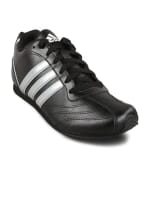

Predicted class: running shoe


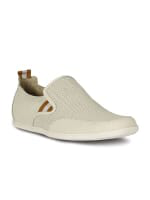

Predicted class: Loafer


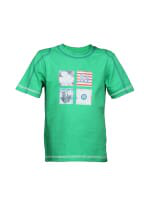

Predicted class: jersey, T-shirt, tee shirt


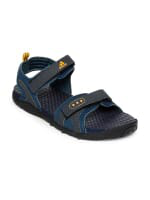

Predicted class: sandal


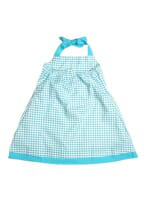

Predicted class: miniskirt, mini


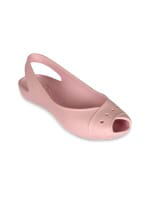

Predicted class: clog, geta, patten, sabot


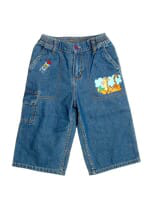

Predicted class: jean, blue jean, denim


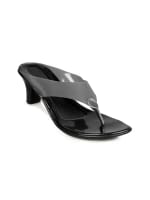

Predicted class: sandal


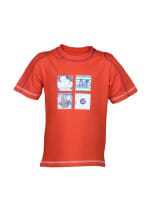

Predicted class: jersey, T-shirt, tee shirt


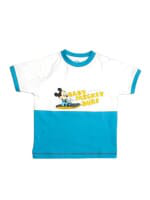

Predicted class: jersey, T-shirt, tee shirt


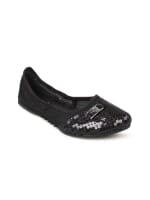

Predicted class: Loafer


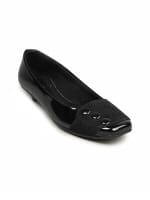

Predicted class: Loafer


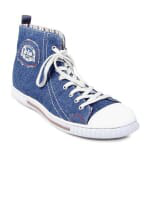

Predicted class: running shoe


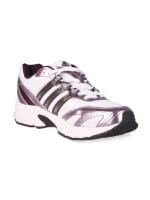

Predicted class: running shoe


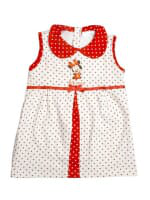

Predicted class: apron


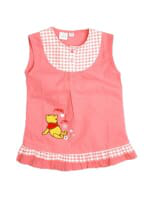

Predicted class: apron


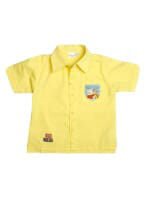

Predicted class: jersey, T-shirt, tee shirt


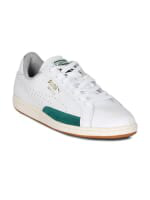

Predicted class: running shoe


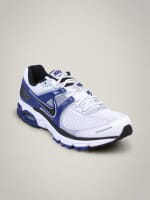

Predicted class: running shoe


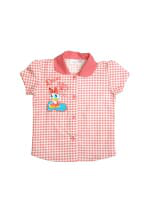

Predicted class: jersey, T-shirt, tee shirt


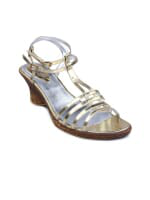

Predicted class: sandal


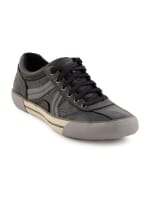

Predicted class: Loafer


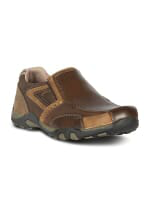

Predicted class: Loafer


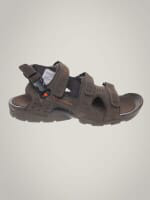

Predicted class: sandal


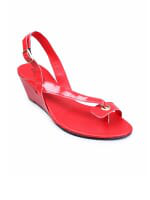

Predicted class: sandal


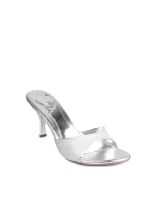

Predicted class: sandal


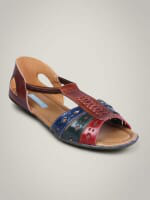

Predicted class: sandal


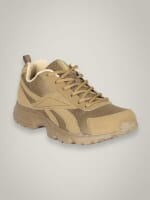

Predicted class: running shoe


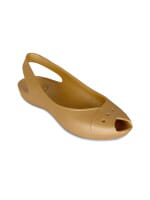

Predicted class: clog, geta, patten, sabot


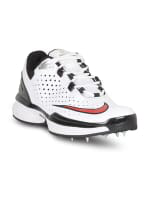

Predicted class: running shoe


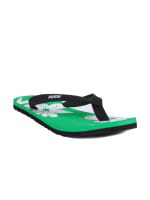

Predicted class: sandal


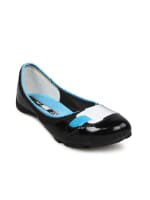

Predicted class: clog, geta, patten, sabot


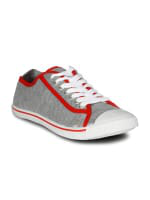

Predicted class: running shoe


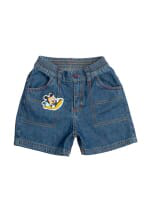

Predicted class: jean, blue jean, denim


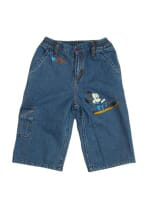

Predicted class: jean, blue jean, denim


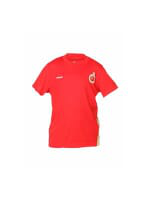

Predicted class: jersey, T-shirt, tee shirt


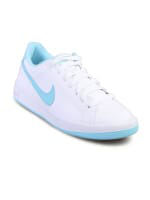

Predicted class: running shoe


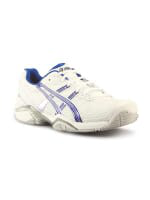

Predicted class: running shoe


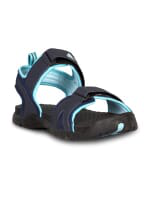

Predicted class: sandal


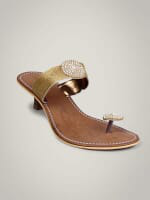

Predicted class: clog, geta, patten, sabot


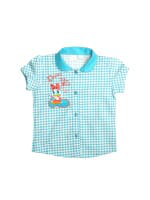

Predicted class: jersey, T-shirt, tee shirt


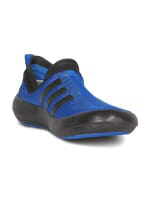

Predicted class: running shoe


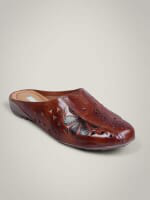

Predicted class: clog, geta, patten, sabot


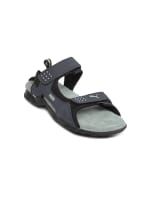

Predicted class: sandal


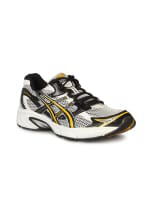

Predicted class: running shoe


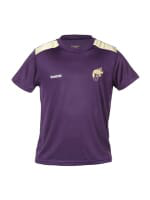

Predicted class: jersey, T-shirt, tee shirt


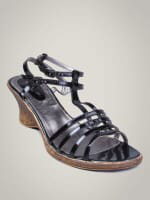

Predicted class: sandal


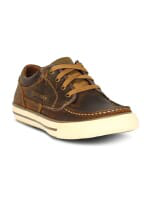

Predicted class: Loafer


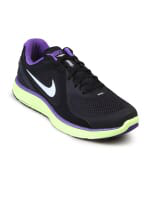

Predicted class: running shoe


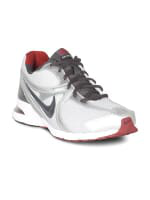

Predicted class: running shoe


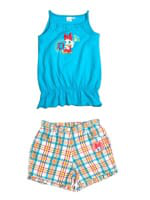

Predicted class: swimming trunks, bathing trunks


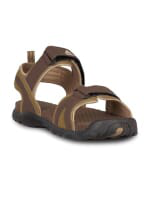

Predicted class: sandal


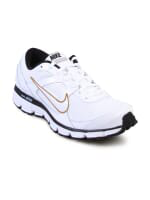

Predicted class: running shoe


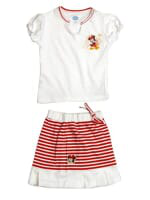

Predicted class: miniskirt, mini


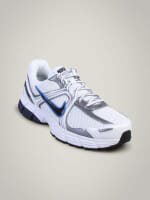

Predicted class: running shoe


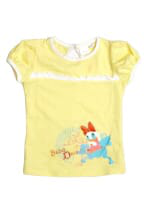

Predicted class: jersey, T-shirt, tee shirt


In [3]:
with open('/content/images.txt') as f:
  for i in f:
    i = i + '?s=200'
    image = Image.open(requests.get(i, stream=True).raw)

    processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
    model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
    image.show()
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    # model predicts one of the 1000 ImageNet classes
    predicted_class_idx = logits.argmax(-1).item()
    print("Predicted class:", model.config.id2label[predicted_class_idx])